In [ ]:
#imports
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import numpy as np
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


In [ ]:
df = pd.read_csv("/content/TSLA - Fractional.csv")

#print all the column names
headers = df.head(0)
print(headers)

#drop all NA values
df = df.dropna()
df = df.dropna(axis=1)
df= df.dropna(how='all')
numRows = df.shape[0]

#convert data column to be more readable for graphing
df['Date'] = pd.to_datetime(df['Date'])

xDate = df['Date']
xOpen = df[['Open']]
xHigh = df[['High']]
xLow = df[['Low']]
xVol = df[['Volume']]
xClose = df[['Close']]

y = df[['Adj Close']]


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


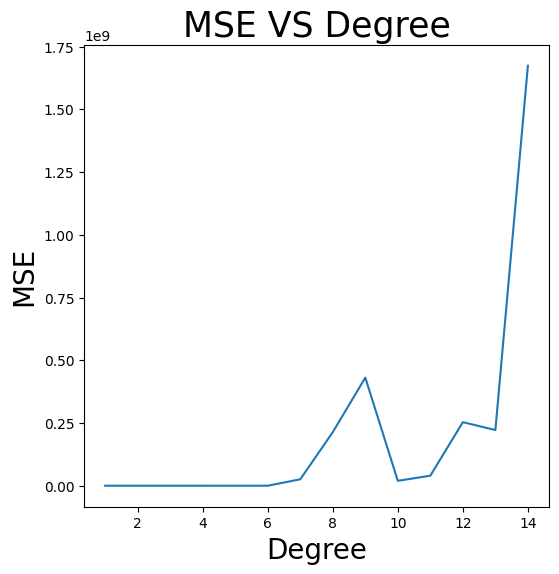

In [ ]:
#using cross validation, check which degree gives the smallest RMSE value

#selects features for X
X = df[['Open', 'High', 'Low']]

#splits data into training and testing splits
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#initialize lists to store training and cross-validation errors
training_error = []
cross_validation_error = []

#define the range of polynomial degrees to test
degrees = np.arange(1, 15)

#iterate over each degree
for d in degrees:
    #create polynomial features
    poly = PolynomialFeatures(degree=d)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.fit_transform(x_test)

    #initialize and fit the linear regression model
    lr = LinearRegression(fit_intercept=False)
    model = lr.fit(x_poly_train, y_train)

    #predict on the training set and calculate training error
    y_train_pred = model.predict(x_poly_train)
    mse_train = mean_squared_error(y_train, y_train_pred)

    #perform cross-validation and calculate cross-validation error
    cve = cross_validate(lr, x_poly_train, y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

    #append errors to the lists
    training_error.append(mse_train)
    cross_validation_error.append(-np.mean(cve['test_score']))

#plot cross-validation error vs degree
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(degrees, cross_validation_error)
ax.set_xlabel('Degree', fontsize=20)
ax.set_ylabel('MSE', fontsize=20)
ax.set_title('MSE VS Degree', fontsize=25)
plt.show()
